In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.patches as pch 
import matplotlib.pyplot as plt
import sys
import os
from scipy.optimize import curve_fit
sys.path.append(os.path.join(os.getcwd(),".."))

In [2]:
def read_table(filename,name):
    mb=pd.read_csv(filename,encoding="utf-8-sig")
    mb["crs"]=mb["LinkName"].apply(lambda x:x[2:]).astype(int)
    mb=mb[(mb["speed"]==10)|(mb["speed"]==20)|(mb["speed"]==30)|(mb["speed"]==40)]
    mb["speed"]+=5
    mb["name"]=name
    mb["ud"]=mb["LinkName"].apply(lambda x:x[:2])
    return mb

In [3]:
mb=read_table("./spdx/multiband.csv","mb")
mtb=read_table("./spdx/MTband.csv","mtb")
mpb=read_table("./spdx/MPband.csv","mpb")
mtpb=read_table("./spdx/LMband.csv","mtpb")


In [4]:
band=pd.DataFrame()
band=pd.concat([band,mb],ignore_index=True)
band=pd.concat([band,mtb],ignore_index=True)
band=pd.concat([band,mpb],ignore_index=True)
band=pd.concat([band,mtpb],ignore_index=True)

In [5]:
band

,speed,LinkName,TQDelay,crs,name,ud
0,15.0,ci1,124.907420,1,mb,ci
1,15.0,ci10,71.420405,10,mb,ci
2,15.0,ci11,58.416015,11,mb,ci
3,15.0,ci12,38.864252,12,mb,ci
4,15.0,ci13,26.848618,13,mb,ci
...,...,...,...,...,...,...
411,45.0,co5,64.253979,5,mtpb,co
412,45.0,co6,66.888157,6,mtpb,co
413,45.0,co7,98.187818,7,mtpb,co
414,45.0,co8,55.656775,8,mtpb,co


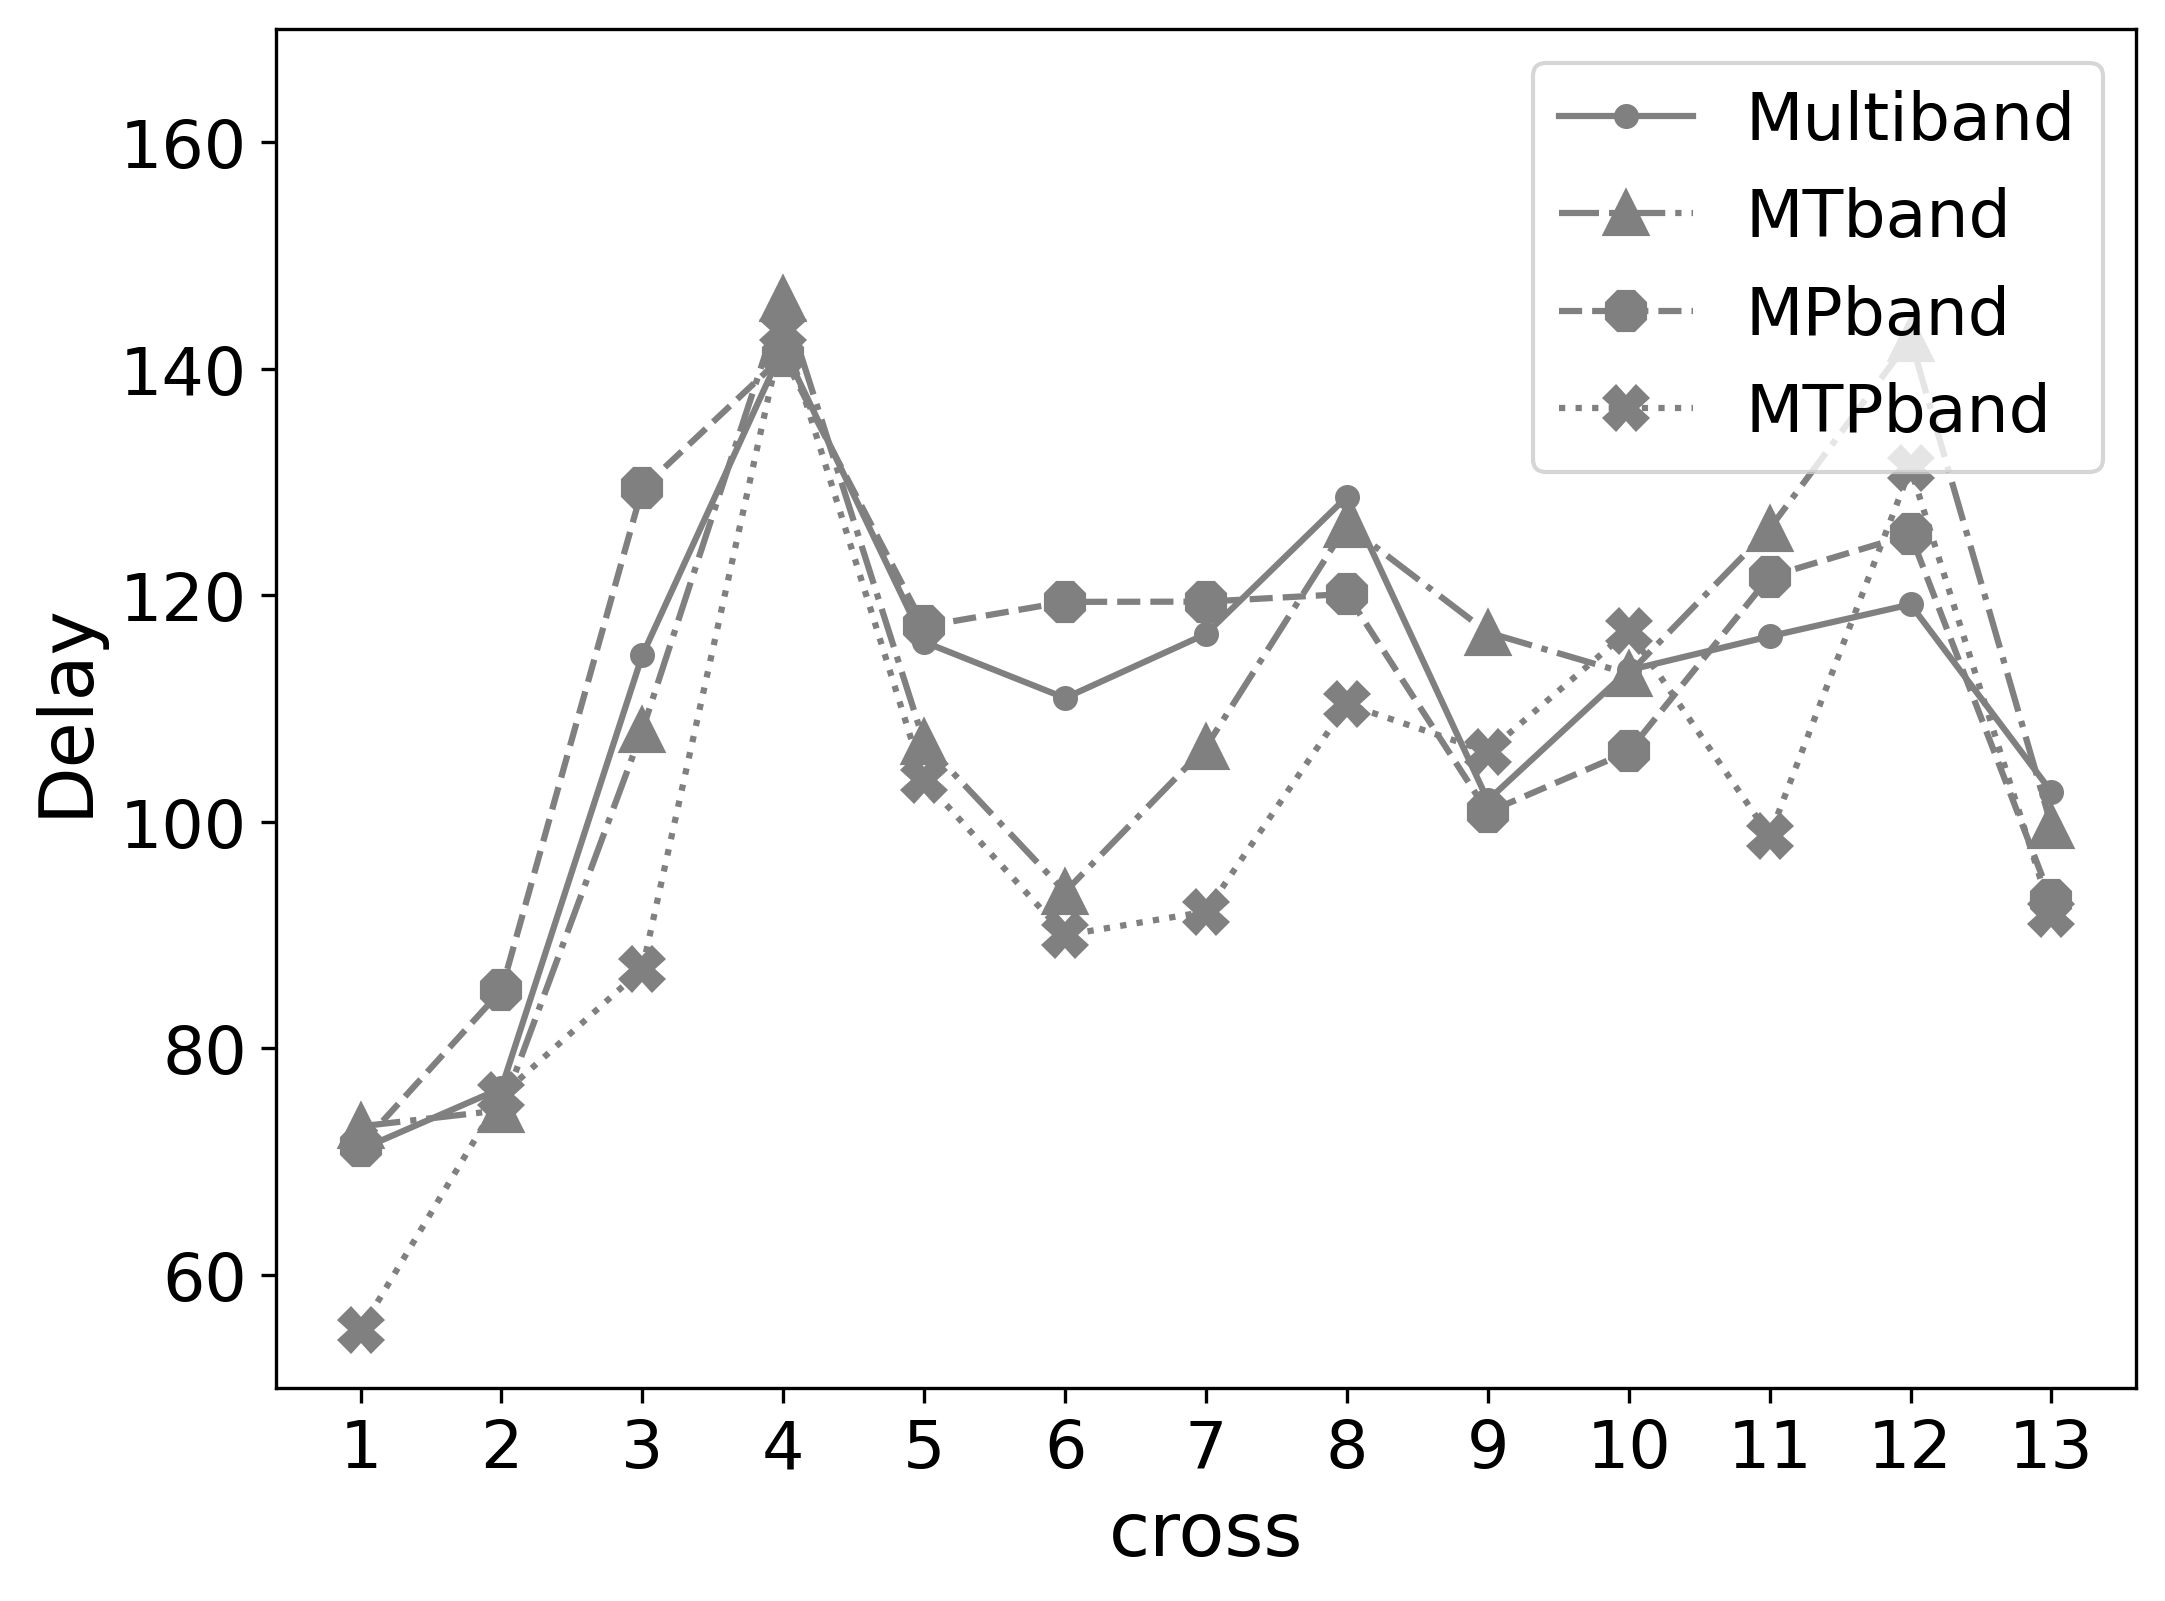

In [6]:
fig2 = plt.figure(figsize=[8, 6], dpi=300)
bd=band[band["speed"]==15]
tmp=bd[bd.name=="mb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='Multiband',linestyle="-",linewidth=1.5, marker='.',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==15]
tmp=bd[bd.name=="mtb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTband',linestyle="-.",linewidth=1.5, marker='^',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==15]
tmp=bd[bd.name=="mpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MPband',linestyle="--",linewidth=1.5, marker='8',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==15]
tmp=bd[bd.name=="mtpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTPband',linestyle=":",linewidth=1.5, marker='X',markersize=10,color='Grey',markerfacecolor='Grey')
plt.legend(fontsize=16,loc="upper right")
plt.xticks([i+1 for i in range(13)])
plt.ylim([50,170])
plt.xlabel('cross', fontsize=18)
plt.ylabel('Delay', fontsize=18)
plt.tick_params(labelsize=16)
# plt.title("延误随饱和度的变化趋势", fontsize=16, y=-.11)
fig2.savefig('./spx15',bbox_inches="tight")

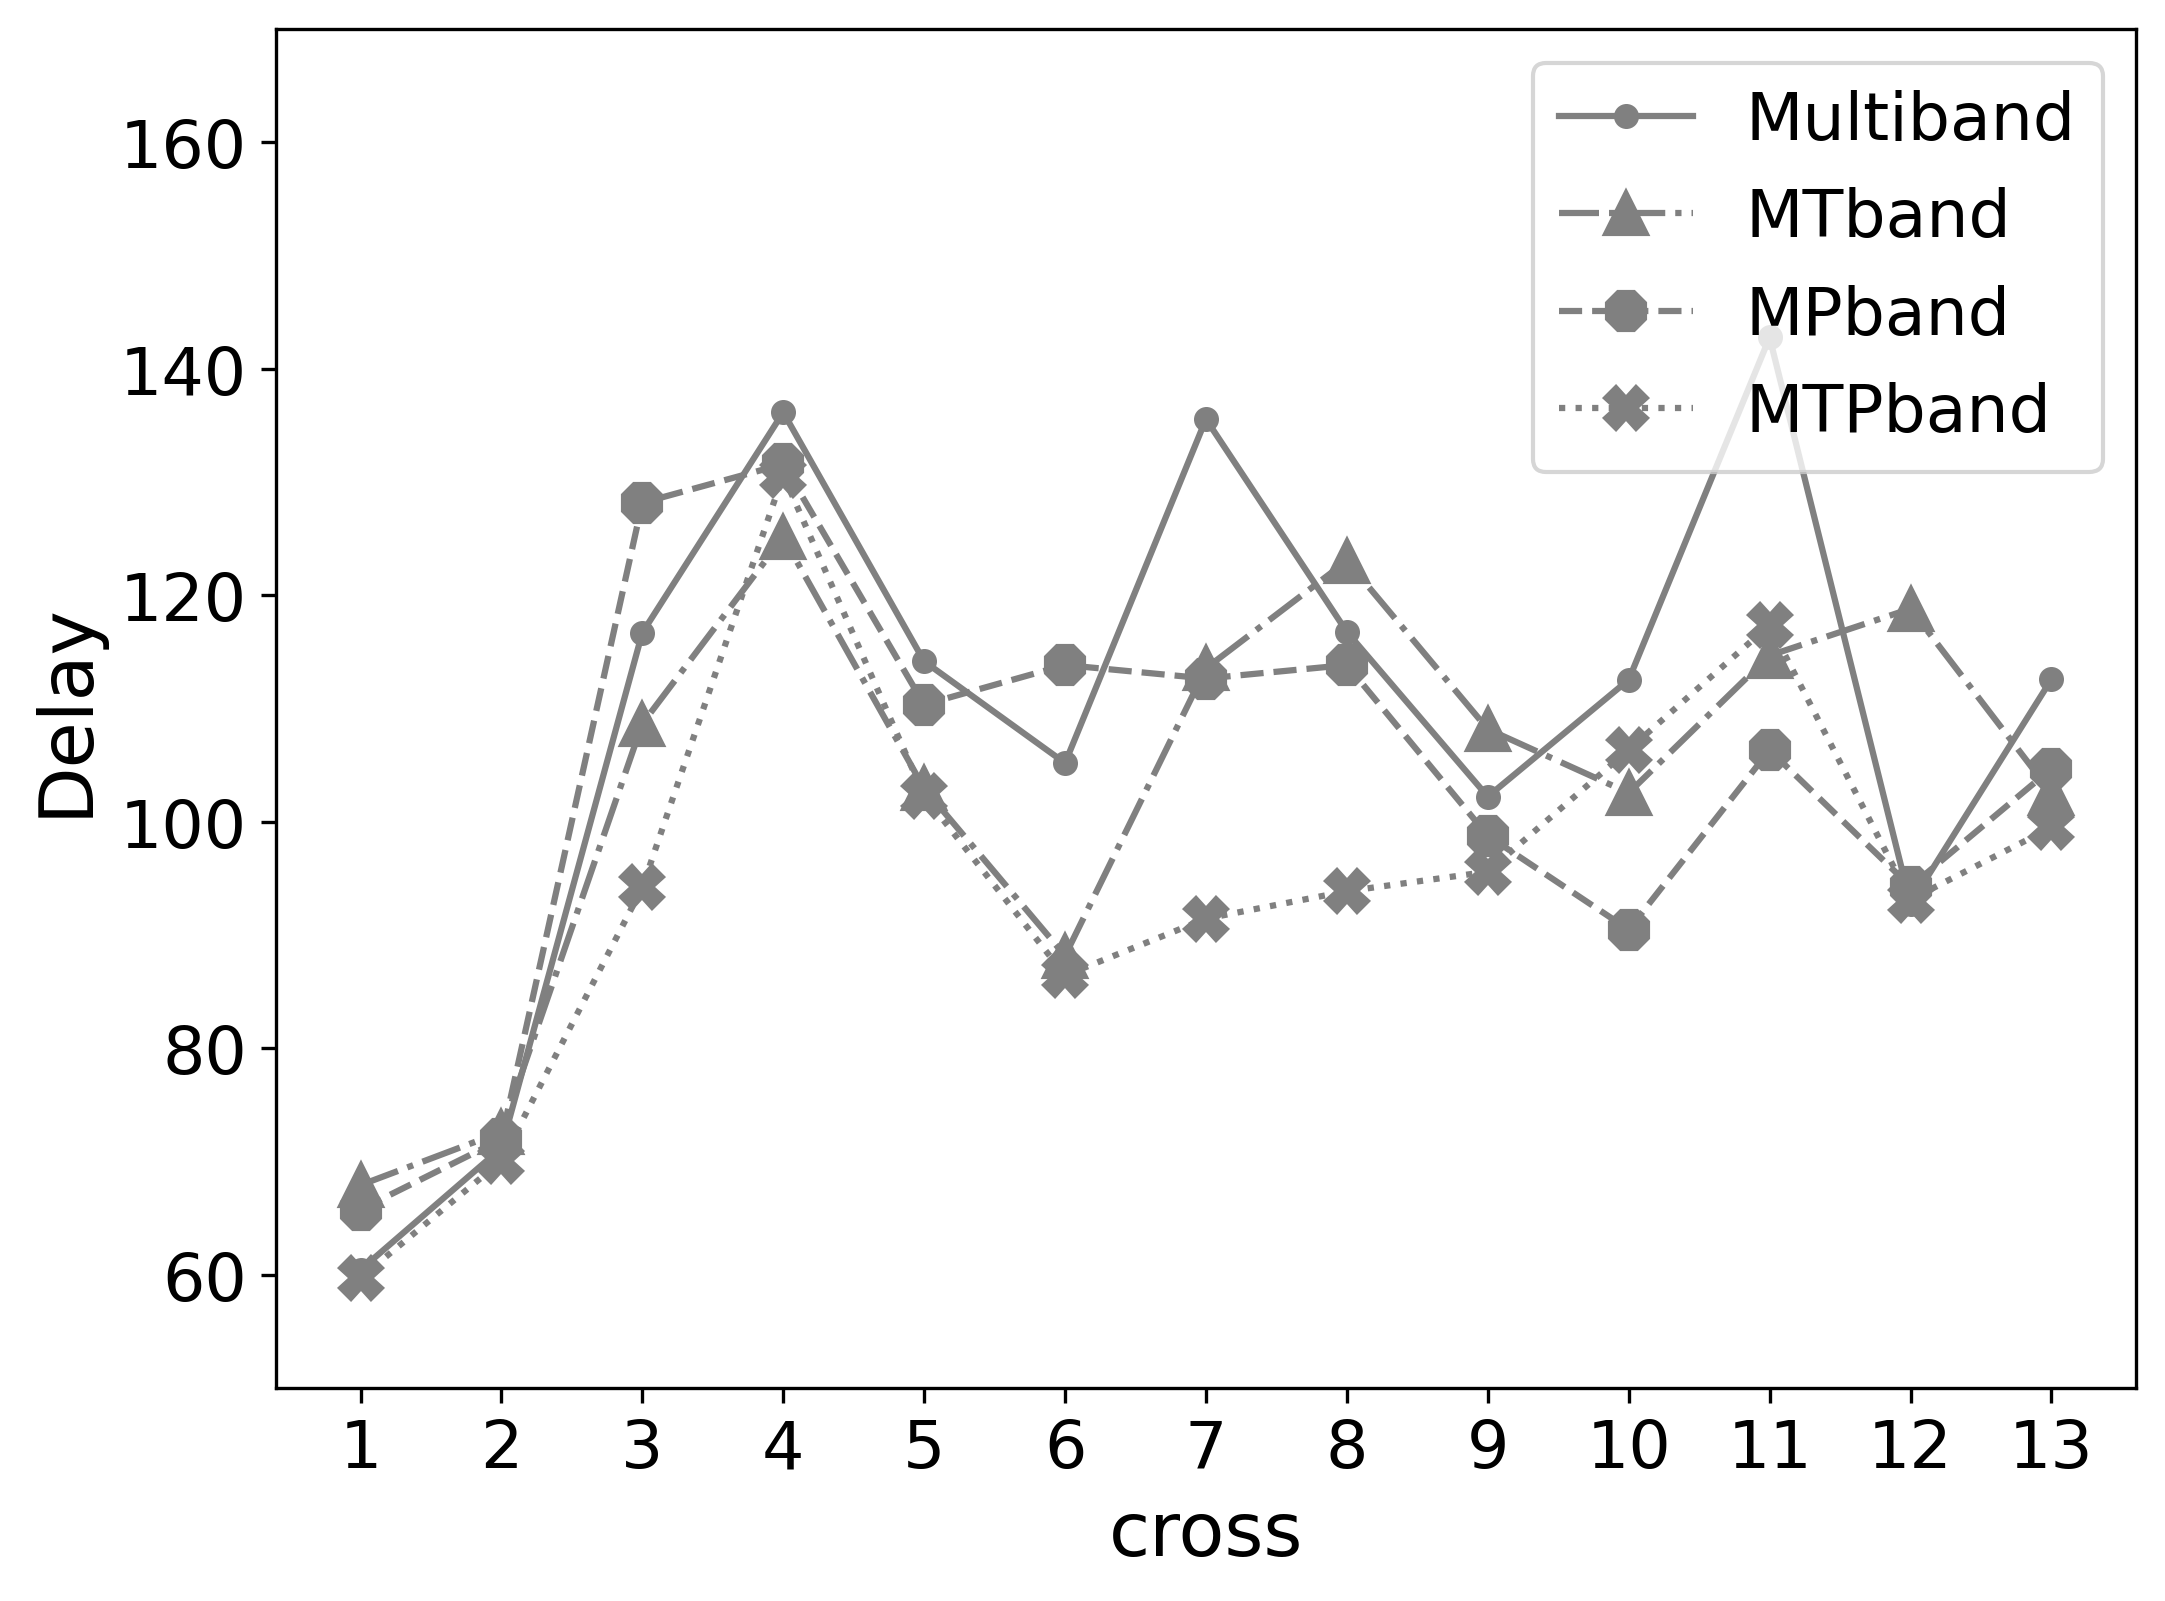

In [7]:
fig2 = plt.figure(figsize=[8, 6], dpi=300)
bd=band[band["speed"]==25]
tmp=bd[bd.name=="mb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='Multiband',linestyle="-",linewidth=1.5, marker='.',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==25]
tmp=bd[bd.name=="mtb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTband',linestyle="-.",linewidth=1.5, marker='^',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==25]
tmp=bd[bd.name=="mpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MPband',linestyle="--",linewidth=1.5, marker='8',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==25]
tmp=bd[bd.name=="mtpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTPband',linestyle=":",linewidth=1.5, marker='X',markersize=10,color='Grey',markerfacecolor='Grey')
plt.legend(fontsize=16,loc="upper right")
plt.xticks([i+1 for i in range(13)])
plt.ylim([50,170])
plt.xlabel('cross', fontsize=18)
plt.ylabel('Delay', fontsize=18)
plt.tick_params(labelsize=16)
# plt.title("延误随饱和度的变化趋势", fontsize=16, y=-.11)
fig2.savefig('./spx25',bbox_inches="tight")

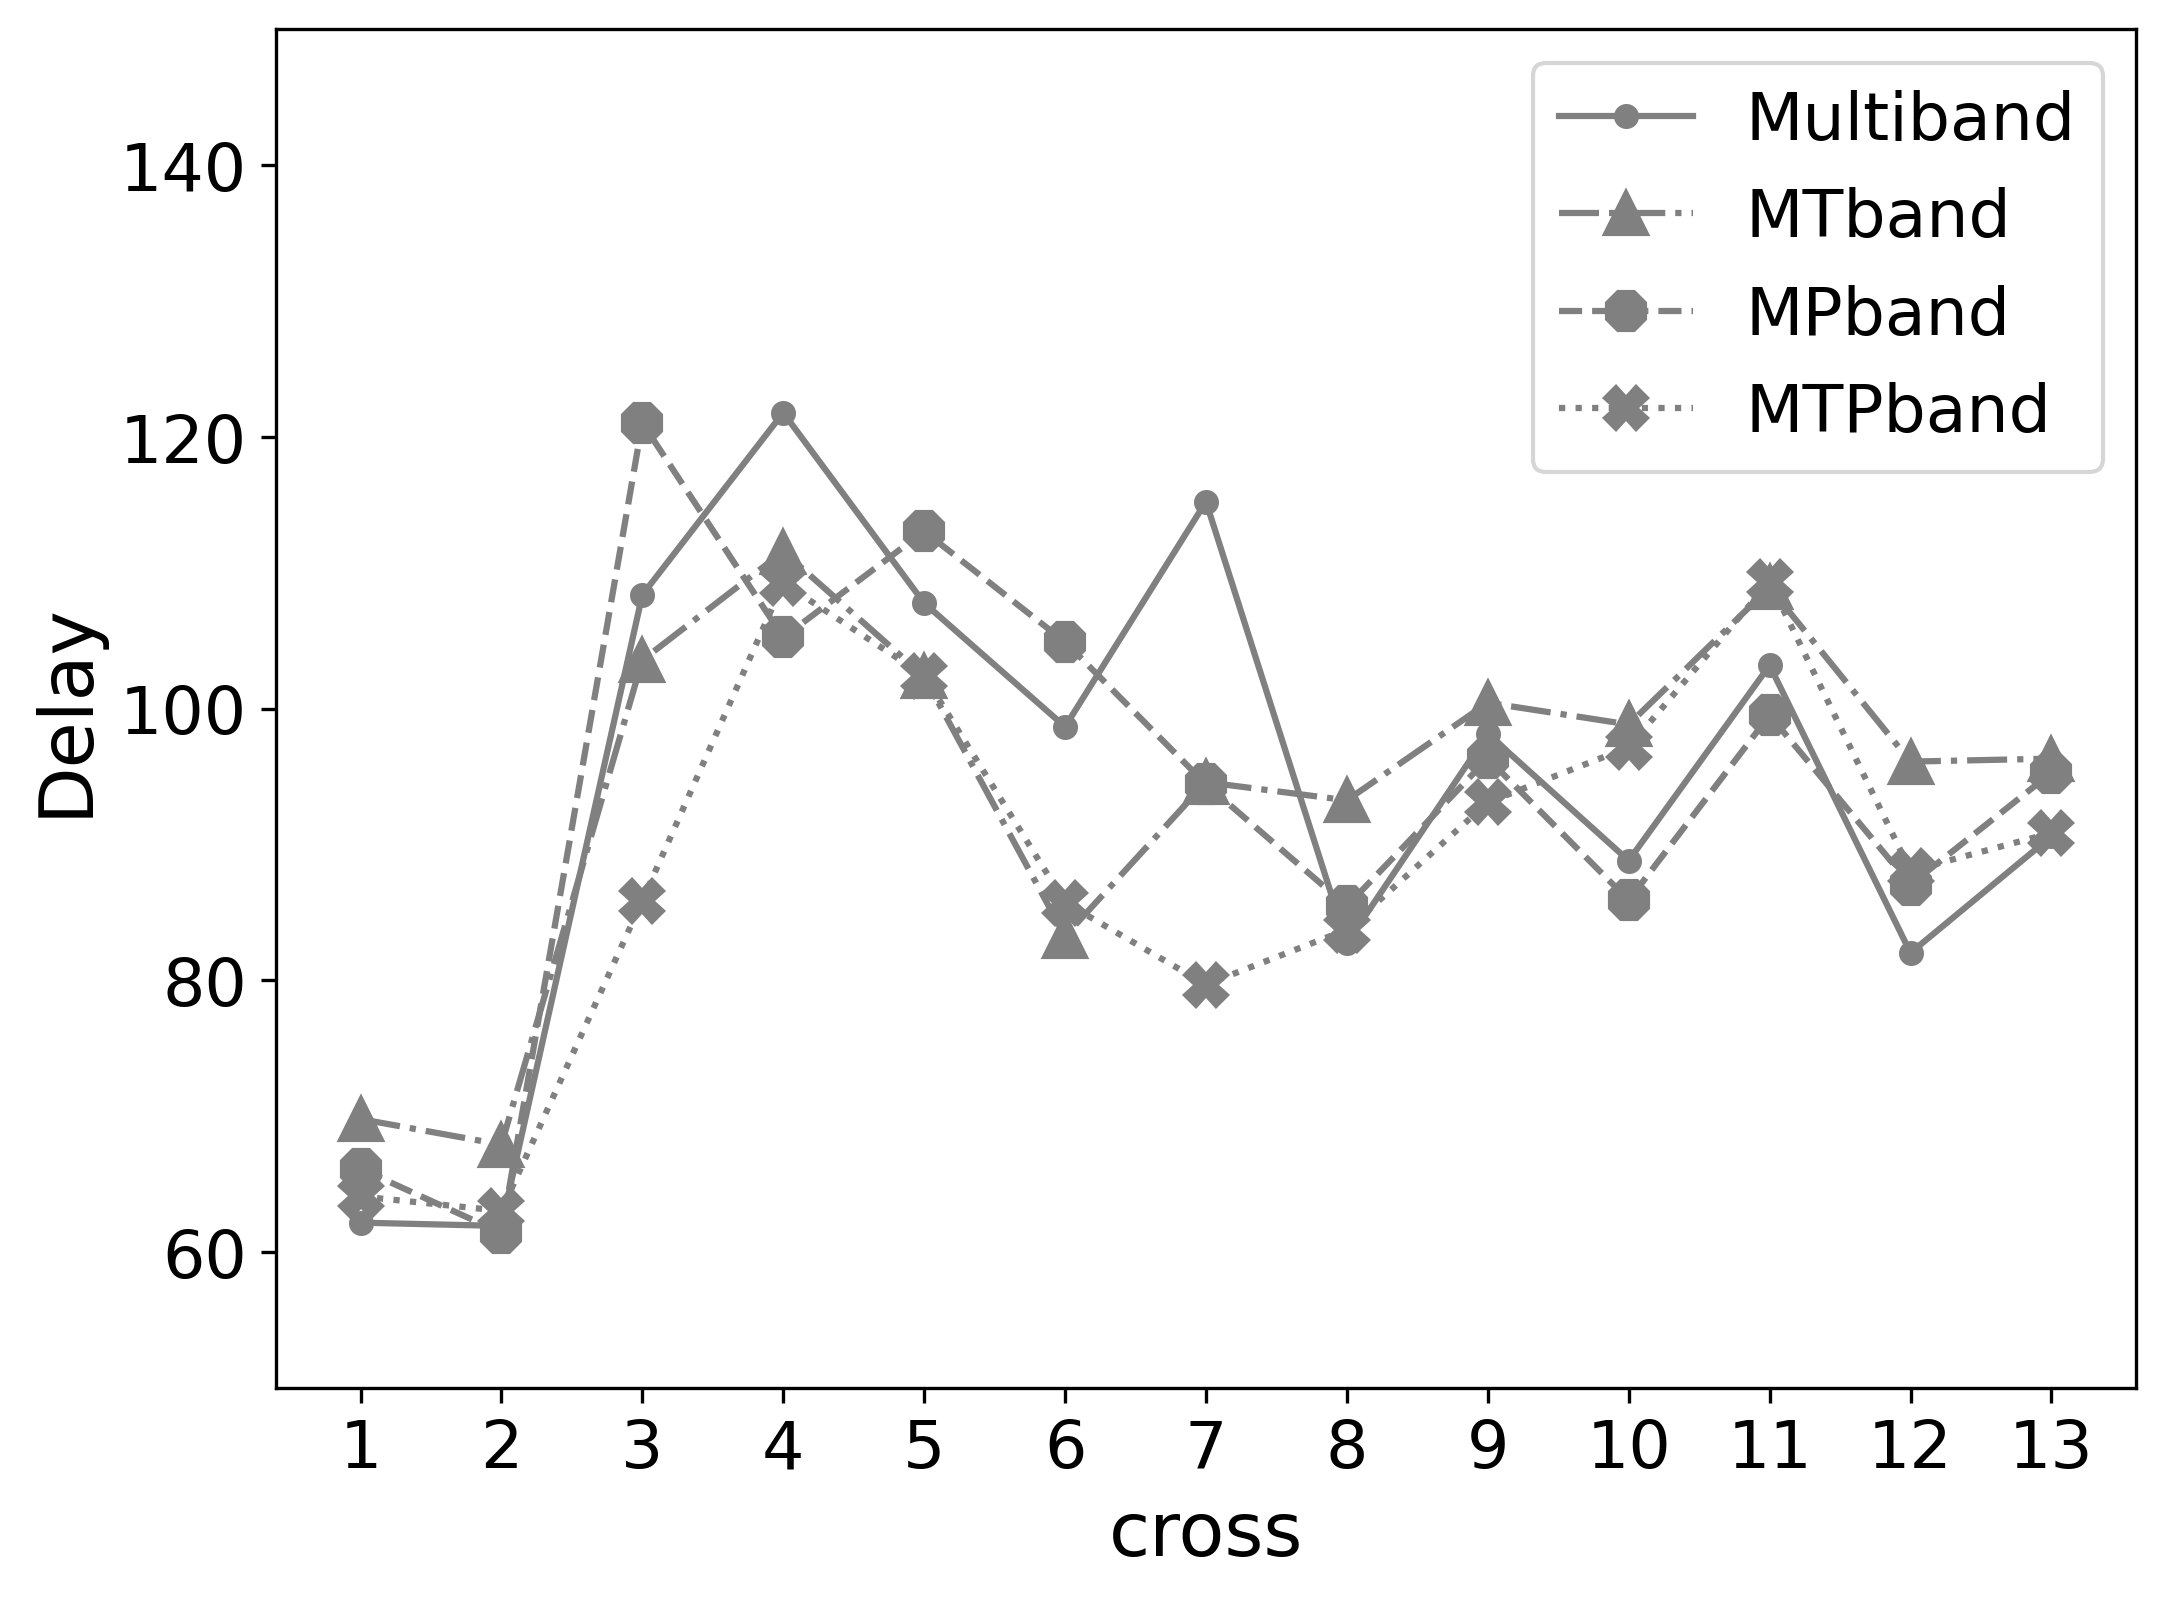

In [8]:
fig2 = plt.figure(figsize=[8, 6], dpi=300)
bd=band[band["speed"]==35]
tmp=bd[bd.name=="mb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='Multiband',linestyle="-",linewidth=1.5, marker='.',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==35]
tmp=bd[bd.name=="mtb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTband',linestyle="-.",linewidth=1.5, marker='^',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==35]
tmp=bd[bd.name=="mpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MPband',linestyle="--",linewidth=1.5, marker='8',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==35]
tmp=bd[bd.name=="mtpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTPband',linestyle=":",linewidth=1.5, marker='X',markersize=10,color='Grey',markerfacecolor='Grey')
plt.legend(fontsize=16,loc="upper right")
plt.xticks([i+1 for i in range(13)])
plt.ylim([50,150])
plt.xlabel('cross', fontsize=18)
plt.ylabel('Delay', fontsize=18)
plt.tick_params(labelsize=16)
# plt.title("延误随饱和度的变化趋势", fontsize=16, y=-.11)
fig2.savefig('spdx35',bbox_inches="tight")

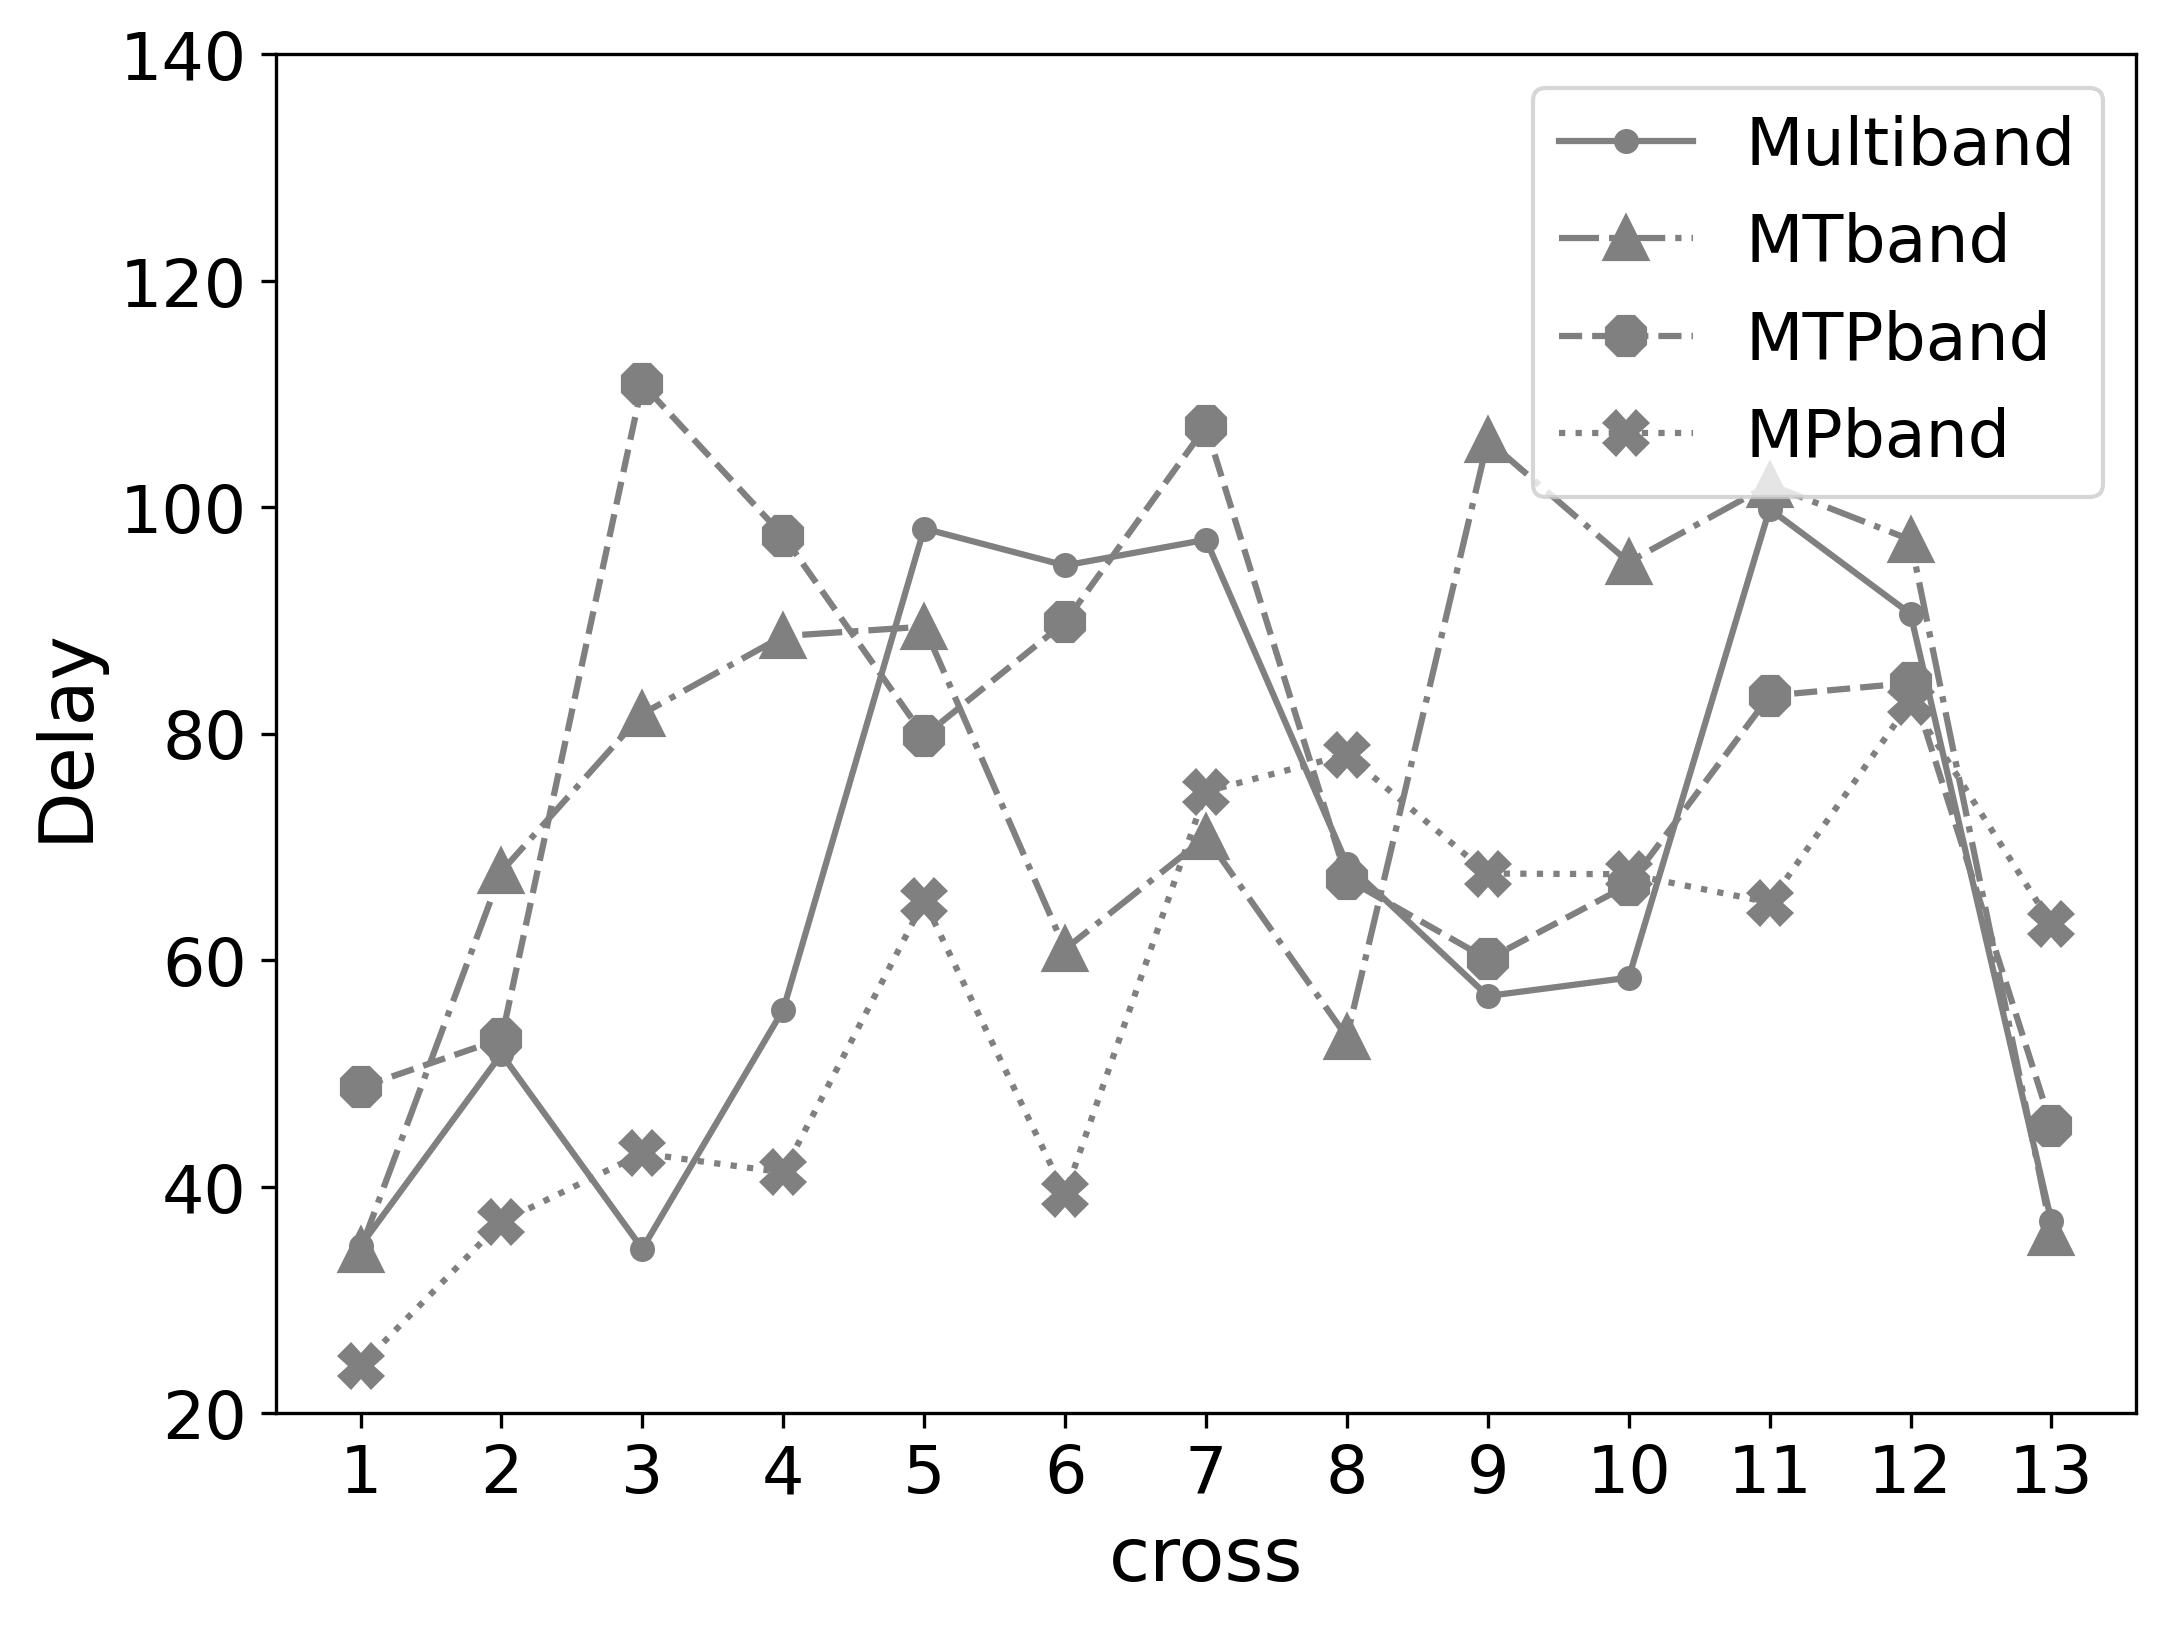

In [9]:
fig2 = plt.figure(figsize=[8, 6], dpi=300)
bd=band[band["speed"]==45]
tmp=bd[bd.name=="mb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='Multiband',linestyle="-",linewidth=1.5, marker='.',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==45]
tmp=bd[bd.name=="mtpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTband',linestyle="-.",linewidth=1.5, marker='^',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==45]
tmp=bd[bd.name=="mpb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MTPband',linestyle="--",linewidth=1.5, marker='8',markersize=10,color='Grey',markerfacecolor='Grey')
bd=band[band["speed"]==45]
tmp=bd[bd.name=="mtb"].groupby("crs")["TQDelay"].mean().sort_index()
plt.plot(tmp.index,tmp,label='MPband',linestyle=":",linewidth=1.5, marker='X',markersize=10,color='Grey',markerfacecolor='Grey')
plt.legend(fontsize=16,loc="upper right")
plt.xticks([i+1 for i in range(13)])
plt.ylim([20,140])
plt.xlabel('cross', fontsize=18)
plt.ylabel('Delay', fontsize=18)
plt.tick_params(labelsize=16)
# plt.title("延误随饱和度的变化趋势", fontsize=16, y=-.11)
fig2.savefig('./spdx45',bbox_inches="tight")